In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sns

In [ ]:
train_label_df = pd.read_csv('Dataset/train_label.csv', header=None)
train_label_df.columns = ["Total_Booking"]
train_label_df.head()
#train_label_df.shape

,Total_Booking
0,504
1,5
2,139
3,209
4,184


In [ ]:
train_df = pd.read_csv('Dataset/train.csv')

#split existing features into multiple features then set specific features as categorical
train_df['datetime'] = train_df['datetime'].apply(pd.to_datetime)
train_df.insert(loc=1, column='hour', value=train_df.datetime.dt.hour)
train_df.insert(loc=2, column='month', value=train_df.datetime.dt.month)
train_df.insert(loc=3, column='weekday', value=train_df.datetime.dt.weekday_name)

train_df[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']] = train_df[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']].astype('category')
#train_df.dtypes
#train_df.head()
#train_df.shape


In [ ]:
df_train = pd.concat([train_df, train_label_df], axis = 1, ignore_index=False)
df_train.head()
#df_train.shape

,datetime,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,19,5,Wednesday,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,4,9,Wednesday,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,9,1,Thursday,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,16,11,Friday,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,13,9,Tuesday,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df_test = pd.read_csv('Dataset/test.csv')

df_test['datetime'] = train_df['datetime'].apply(pd.to_datetime)
df_test.insert(loc=1, column='hour', value=train_df.datetime.dt.hour)
df_test.insert(loc=2, column='month', value=train_df.datetime.dt.month)
df_test.insert(loc=3, column='weekday', value=train_df.datetime.dt.weekday_name)

df_test[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']] = df_test[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']].astype('category')

labelencoder = LabelEncoder()

df_test['hour'] = labelencoder.fit_transform(df_test['hour'])
df_test['month'] = labelencoder.fit_transform(df_test['month'])
df_test['weekday'] = labelencoder.fit_transform(df_test['weekday'])
df_test['season'] = labelencoder.fit_transform(df_test['season'])
df_test['holiday'] = labelencoder.fit_transform(df_test['holiday'])
df_test['workingday'] = labelencoder.fit_transform(df_test['workingday'])
df_test['weather'] = labelencoder.fit_transform(df_test['weather'])

df_test.head()
#df_test.shape

,datetime,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-05-02 19:00:00,19,4,6,2,0,1,0,21.32,25.000,48,35.0008
1,2012-09-05 04:00:00,4,8,6,2,0,0,0,23.78,27.275,64,7.0015
2,2011-01-13 09:00:00,9,0,4,1,0,0,1,11.48,12.120,100,27.9993
3,2011-11-18 16:00:00,16,10,0,3,0,1,2,25.42,28.790,83,0.0000
4,2011-09-13 13:00:00,13,8,5,2,0,0,0,25.42,31.060,43,23.9994


In [ ]:
df_train.isnull().sum()

datetime         0
hour             0
month            0
weekday          0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [ ]:
test_label_df = pd.read_csv('Dataset/test_label.csv', header=None)
test_label_df.head()

,0
0,256
1,87
2,11
3,84
4,668


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 13 columns):
datetime         8708 non-null datetime64[ns]
hour             8708 non-null category
month            8708 non-null category
weekday          8708 non-null category
season           8708 non-null category
holiday          8708 non-null category
workingday       8708 non-null category
weather          8708 non-null category
temp             8708 non-null float64
atemp            8708 non-null float64
humidity         8708 non-null int64
windspeed        8708 non-null float64
Total_Booking    8708 non-null int64
dtypes: category(7), datetime64[ns](1), float64(3), int64(2)
memory usage: 469.9 KB


In [ ]:
df_test.isnull().sum()

datetime      0
hour          0
month         0
weekday       0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

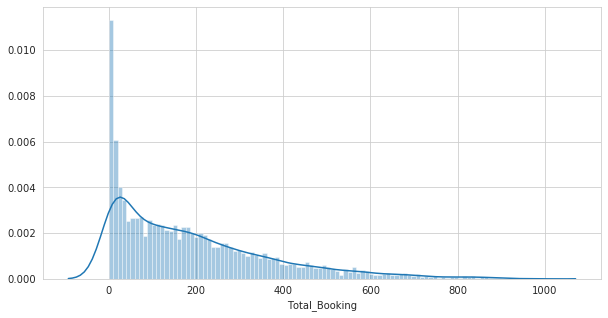

In [ ]:
#VISUALIZING THE DATA

plt.figure(figsize=(10,5))
sns.distplot(df_train['Total_Booking'], bins=100)

In [ ]:
df_train.describe()['Total_Booking']

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_Booking, dtype: float64

In [ ]:
#perform label encoding on categorical features so that they can be visualized
labelencoder = LabelEncoder()

df_train['hour'] = labelencoder.fit_transform(df_train['hour'])
df_train['month'] = labelencoder.fit_transform(df_train['month'])
df_train['weekday'] = labelencoder.fit_transform(df_train['weekday'])
df_train['season'] = labelencoder.fit_transform(df_train['season'])
df_train['holiday'] = labelencoder.fit_transform(df_train['holiday'])
df_train['workingday'] = labelencoder.fit_transform(df_train['workingday'])
df_train['weather'] = labelencoder.fit_transform(df_train['weather'])

df_train.head()

,datetime,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,19,4,6,2,0,1,0,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,4,8,6,0,0,1,0,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,9,0,4,1,0,1,0,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,16,10,0,3,0,1,0,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,13,8,5,0,0,1,0,30.34,33.335,51,19.0012,184


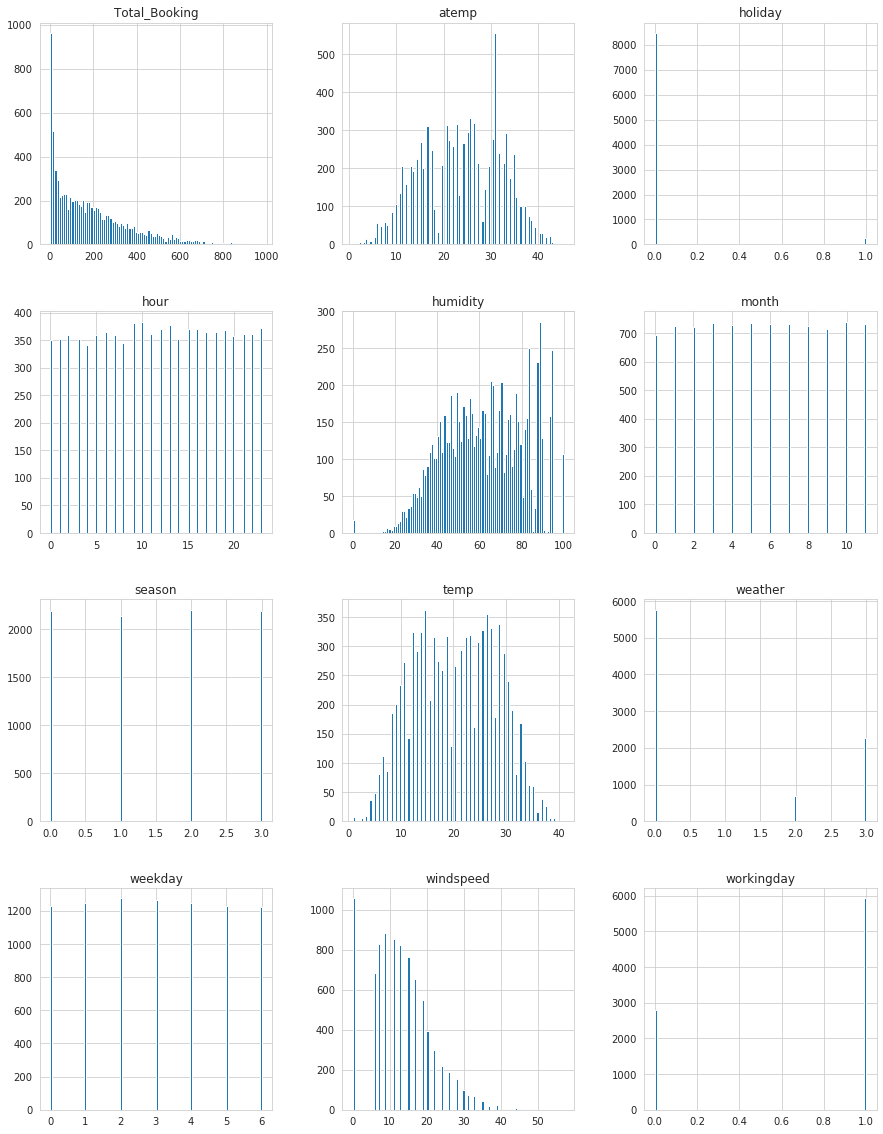

In [ ]:
df_train.hist(figsize=(15,20), bins=100)
plt.show()

In [ ]:
#OBSERVATIONS:
#Total_booking and windspeed seem to have visual correlation as do humidity and temp
#the label encoded categorical columns are visually distinct as the distribution of data is very...categorical

In [ ]:
total_bookings_per_annum = defaultdict(int)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][12]
    #add the total number of bookings to the current value for the year
    total_bookings_per_annum[dates.year] = num_bookings + total_bookings_per_annum[dates.year]
    
print(total_bookings_per_annum)

defaultdict(<class 'int'>, {2012: 1059462, 2011: 621243})


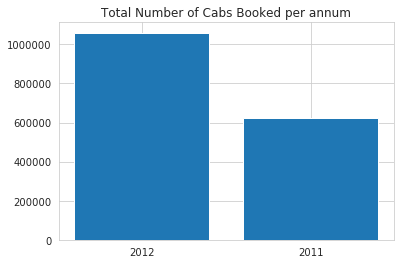

In [ ]:
plt.bar(range(len(total_bookings_per_annum)), list(total_bookings_per_annum.values()), align='center')
plt.xticks(range(len(total_bookings_per_annum)), list(total_bookings_per_annum.keys()))
plt.title("Total Number of Cabs Booked per annum")
plt.show()

In [ ]:
daily_bookings = defaultdict(int)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][12]
    #add the total number of bookings to the current value for the day
    daily_bookings[dates.day] = num_bookings + daily_bookings[dates.day]

print(daily_bookings)

defaultdict(<class 'int'>, {2: 83911, 5: 87773, 13: 89840, 18: 88642, 17: 92088, 6: 86512, 10: 89754, 14: 93887, 9: 91240, 19: 92258, 12: 81878, 7: 85538, 3: 88755, 4: 89366, 11: 88784, 1: 83268, 16: 89998, 15: 93583, 8: 83630})


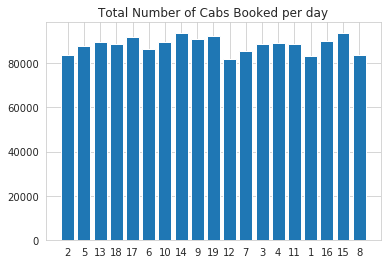

In [ ]:
plt.bar(range(len(daily_bookings)), list(daily_bookings.values()), align='center')
plt.xticks(range(len(daily_bookings)), list(daily_bookings.keys()))
plt.title("Total Number of Cabs Booked per day")
plt.show()

In [ ]:
hourly_bookings = defaultdict(int)

for day in df_train.iterrows():
    dates = day[1][0]
    num_bookings=day[1][12]
    #add the total number of bookings to the current value for the hour
    hourly_bookings[dates.hour+1] = num_bookings + hourly_bookings[dates.hour+1]

print(hourly_bookings)

defaultdict(<class 'int'>, {20: 115587, 5: 2208, 10: 84036, 17: 116942, 14: 97915, 18: 173281, 19: 156788, 16: 95438, 21: 83121, 15: 85972, 24: 33306, 12: 78187, 9: 127856, 2: 11975, 11: 65696, 23: 49585, 8: 77764, 3: 8361, 13: 95434, 1: 19673, 4: 4153, 6: 7052, 7: 27368, 22: 63007})


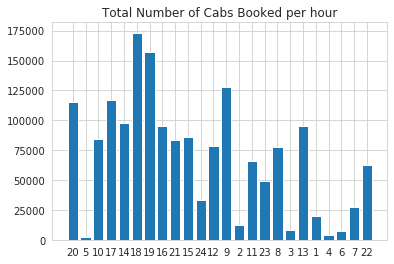

In [ ]:
plt.bar(range(len(hourly_bookings)), list(hourly_bookings.values()), align='center')
plt.xticks(range(len(hourly_bookings)), list(hourly_bookings.keys()))
plt.title("Total Number of Cabs Booked per hour")
plt.show()

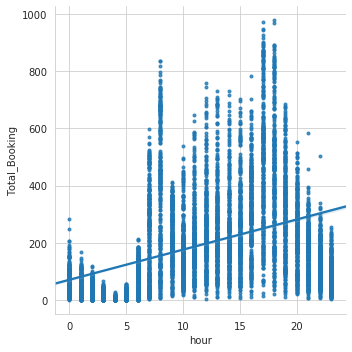

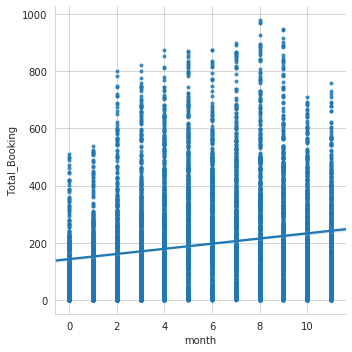

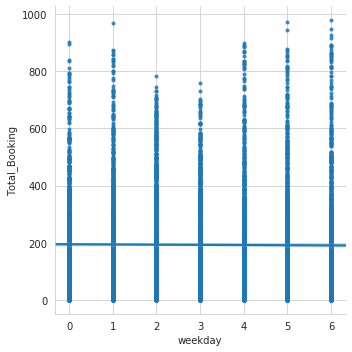

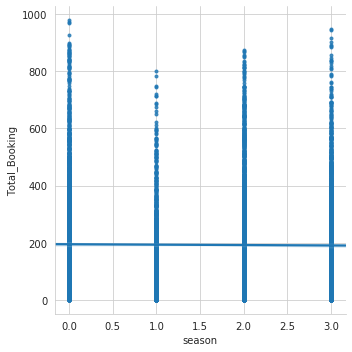

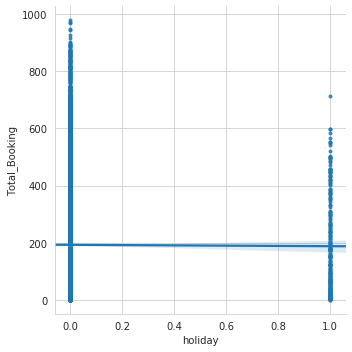

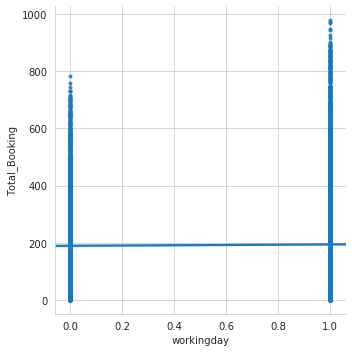

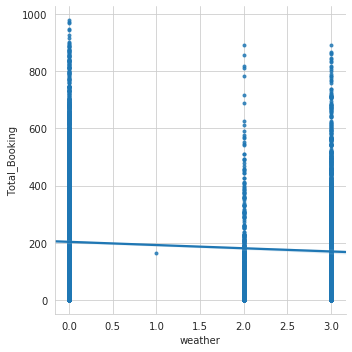

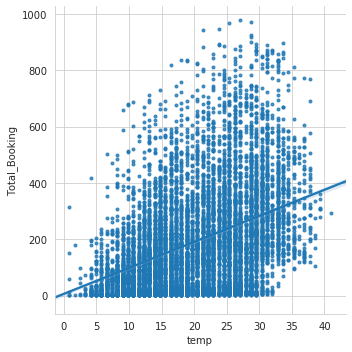

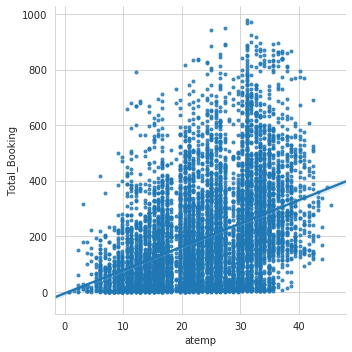

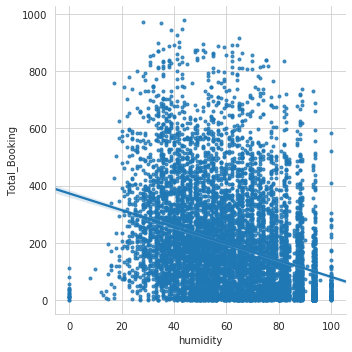

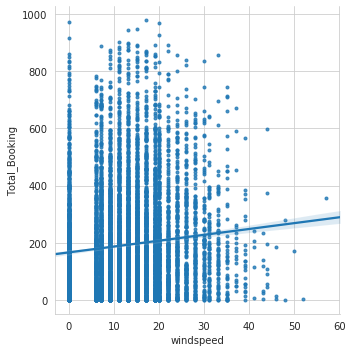

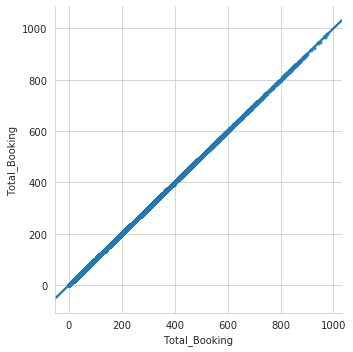

In [ ]:
for i in df_train.columns.tolist()[1:]:
    sns.lmplot(x=i, y='Total_Booking', data=df_train, markers='.')

In [ ]:
#CORRELATION BETWEEN FEATURES

df_train.corr()['Total_Booking'].sort_values(ascending=False)

Total_Booking    1.000000
hour             0.399947
temp             0.397456
atemp            0.392754
month            0.170355
windspeed        0.092090
workingday       0.012285
holiday         -0.004391
weekday         -0.006961
season          -0.008503
weather         -0.082382
humidity        -0.307982
Name: Total_Booking, dtype: float64

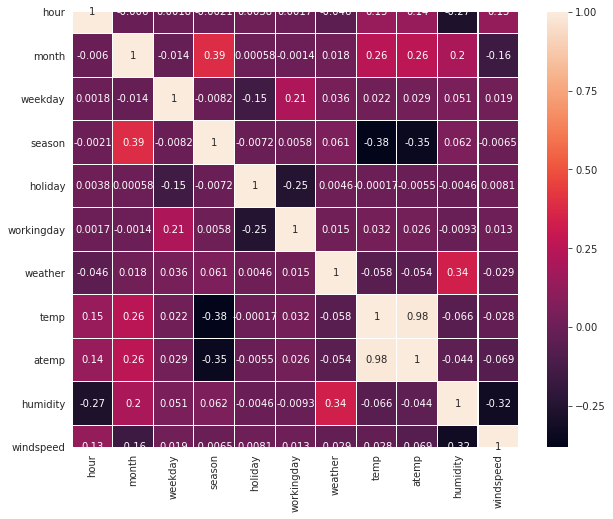

In [ ]:
plt.figure(figsize=(10, 8))
df_corr = df_train.drop('Total_Booking', axis=1).corr()
sns.heatmap(df_corr, annot=True, linewidths=0.1)
plt.show()

In [ ]:
#OBSERVATIONS and CONCLUSIONS:
#temp and atemp are highly correlated; need to drop one of the two 
#most features are partially correlated; can use these as independent variables.

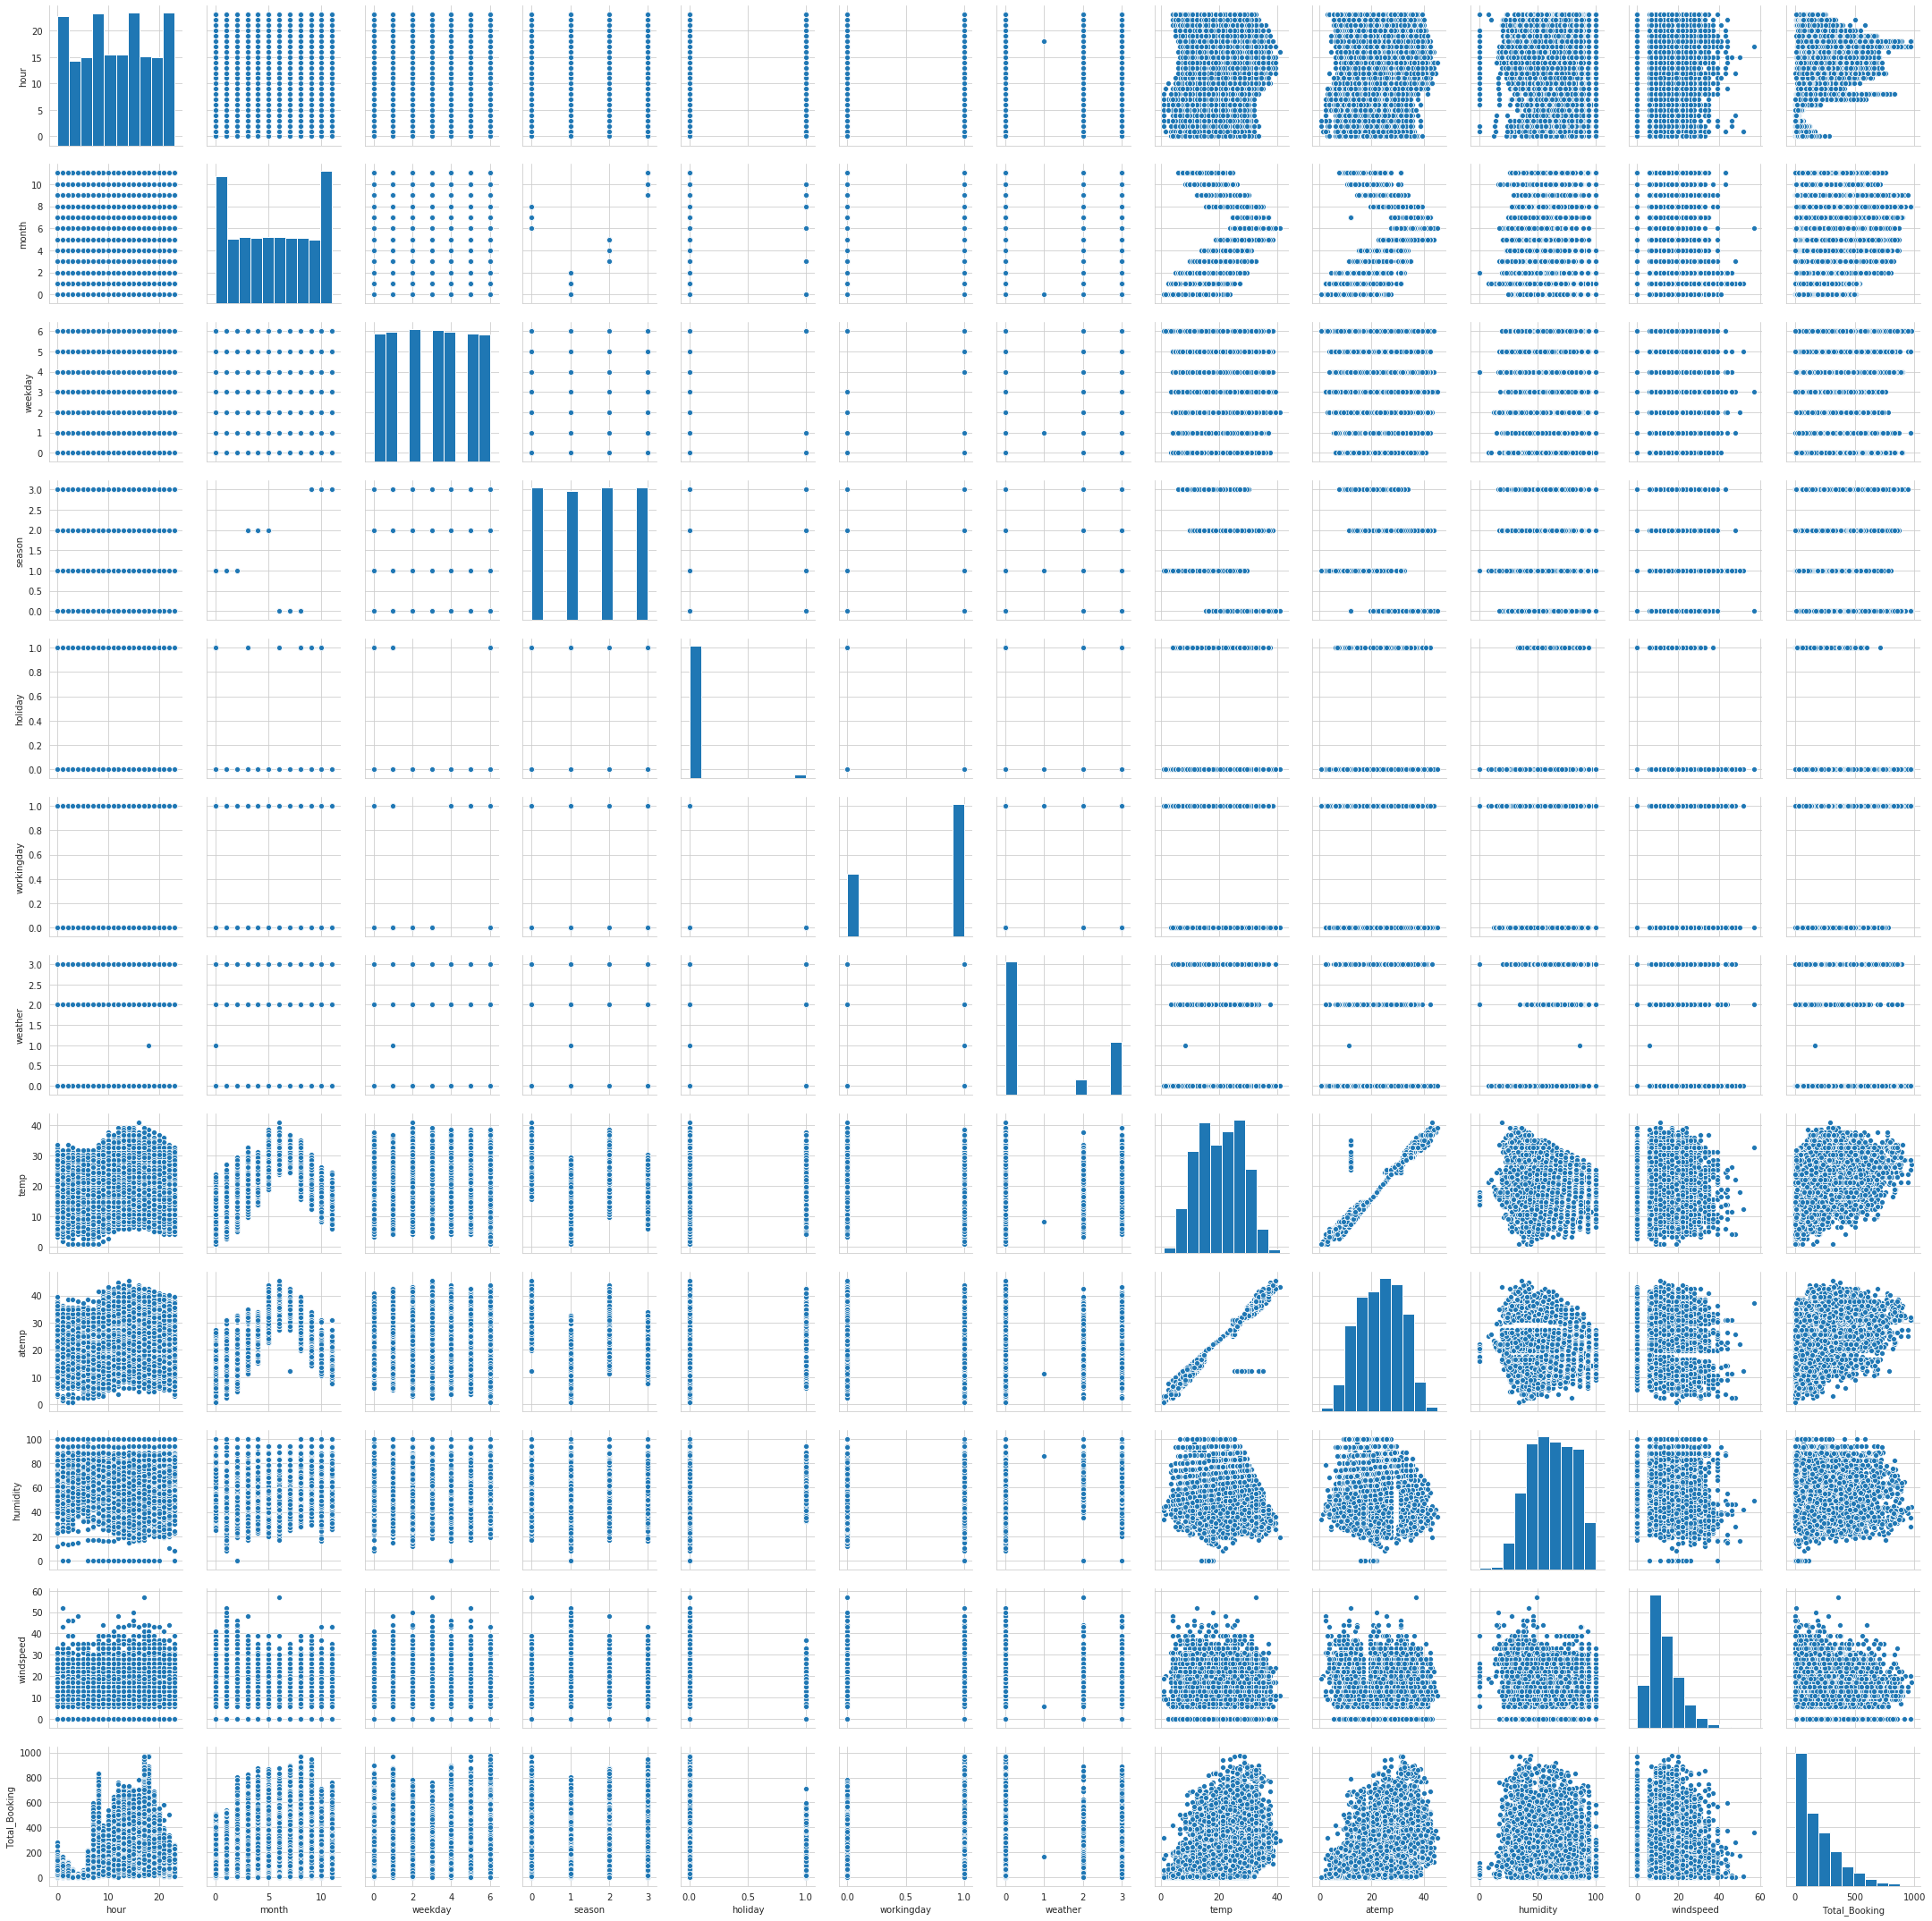

In [ ]:
#PAIRPLOTS:
#pair plots are a mix of scatter plots and bar plots; can check the multicollinearity between features
#aids in visualizing ouliers in every feature
#bar plots (diagonal plots) validates the trends of feature importance as compared to plots of feature dependence

sns.pairplot(df_train)
plt.show()

<Figure size 720x576 with 0 Axes>

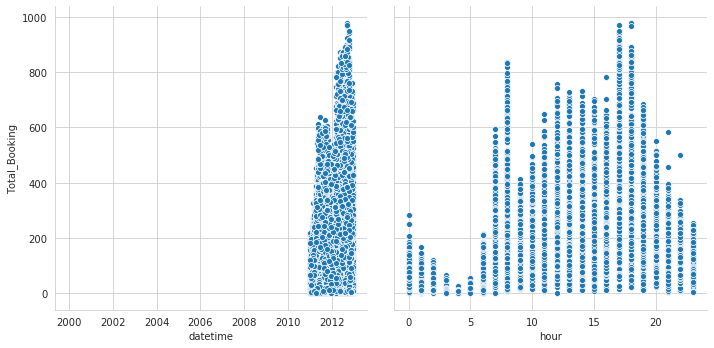

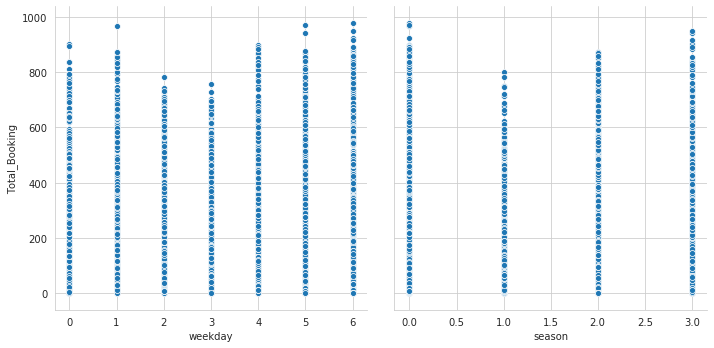

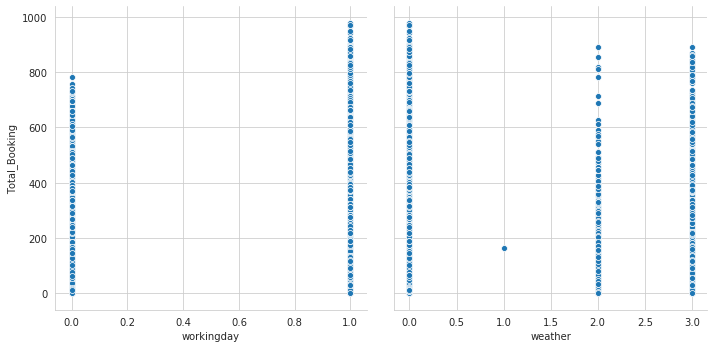

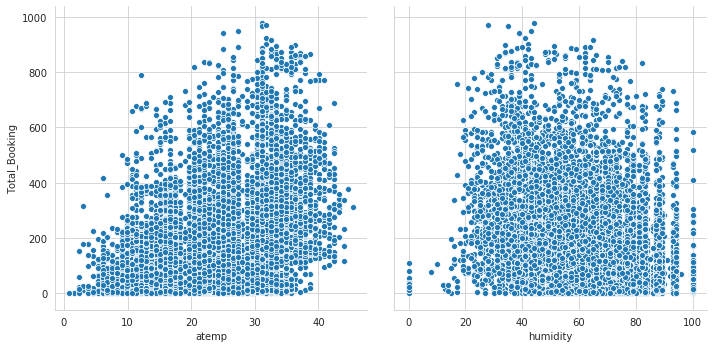

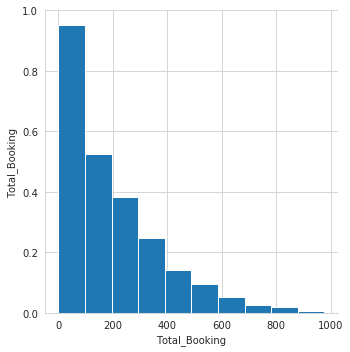

In [ ]:
#the following pair plots plot 'Total_Booking' (dependent feature) against every independent feature for trend observation

plt.figure(figsize=(10,8))

for i in range(0, len(df_train.columns),3):
    sns.pairplot(data=df_train, x_vars=df_train.columns[i:i+2], y_vars=['Total_Booking'], height=5)
plt.show()

In [ ]:
#OBVERSATIONS:
#categorical features are scattered linearlly; quantitative features are scattered unpreidictibly

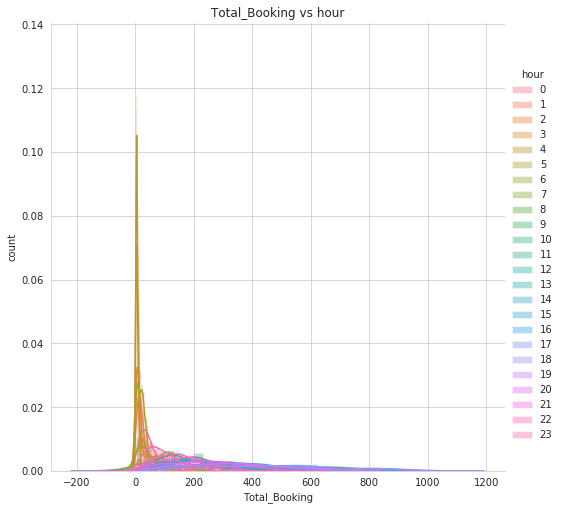

In [ ]:
#HISTOGRAMS:
#CDF plots like histograms are better for representing categorical data

sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='hour', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs hour')
plt.ylabel('count')
plt.show()

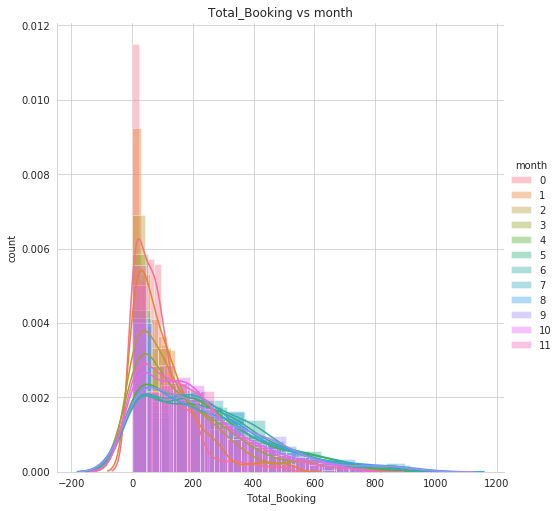

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='month', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs month')
plt.ylabel('count')
plt.show()

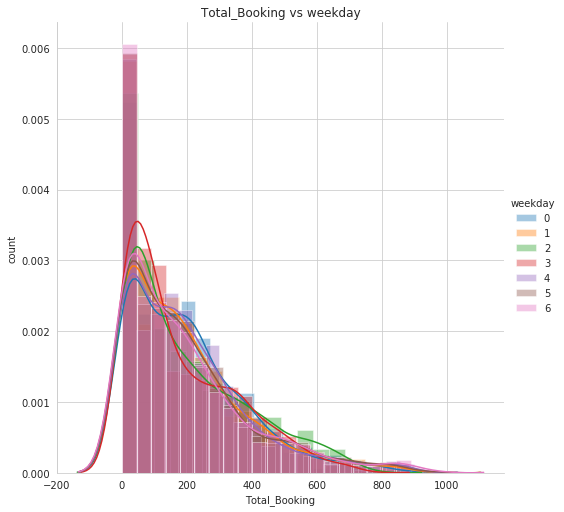

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='weekday', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs weekday')
plt.ylabel('count')
plt.show()

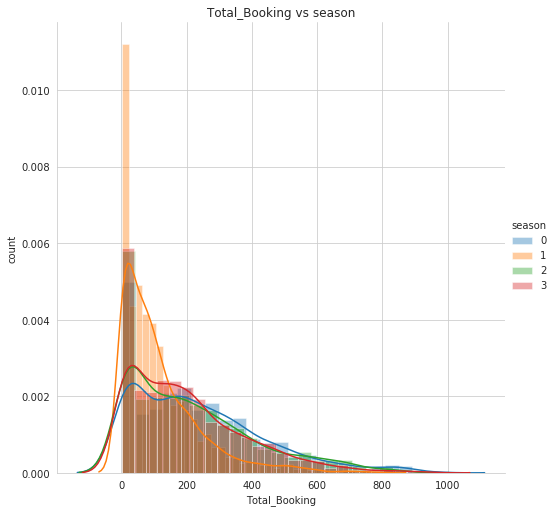

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='season', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs season')
plt.ylabel('count')
plt.show()

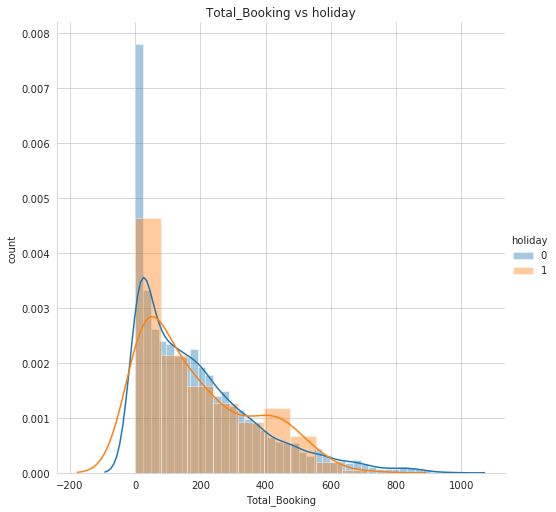

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='holiday', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs holiday')
plt.ylabel('count')
plt.show()

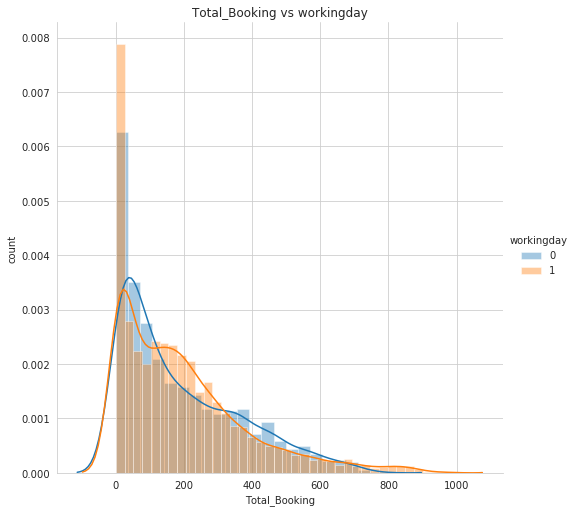

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='workingday', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs workingday')
plt.ylabel('count')
plt.show()

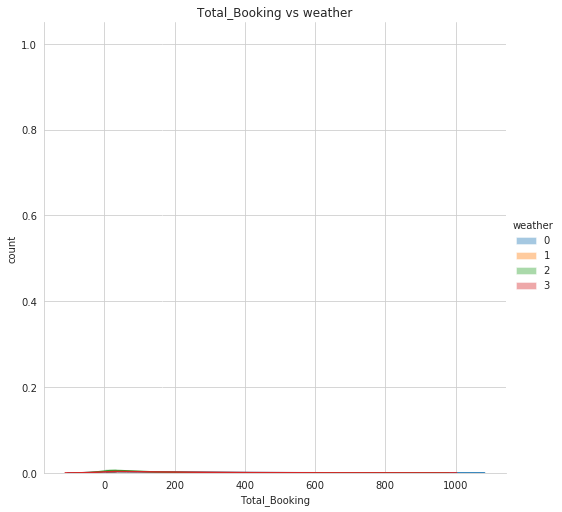

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_train, hue='weather', height=7).map(sns.distplot,"Total_Booking").add_legend()
plt.title('Total_Booking vs weather')
plt.ylabel('count')
plt.show()

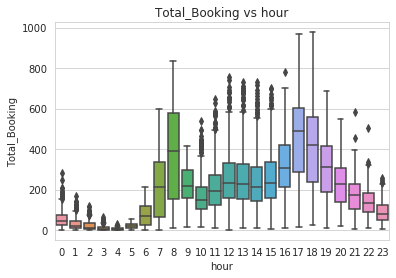

In [ ]:
#BOX PLOTS

sns.boxplot(x='hour',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs hour')
plt.show()

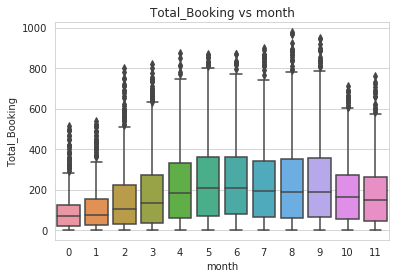

In [ ]:
sns.boxplot(x='month',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs month')
plt.show()

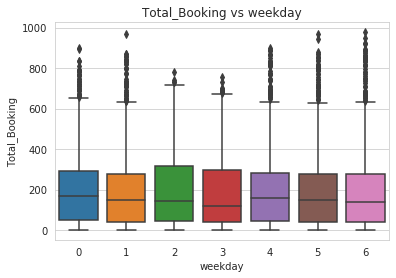

In [ ]:
sns.boxplot(x='weekday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs weekday')
plt.show()

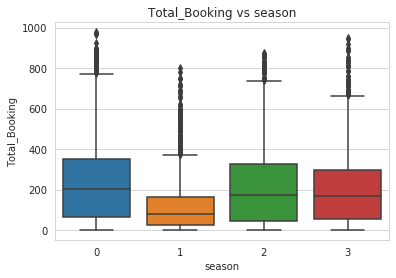

In [ ]:
sns.boxplot(x='season',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs season')
plt.show()

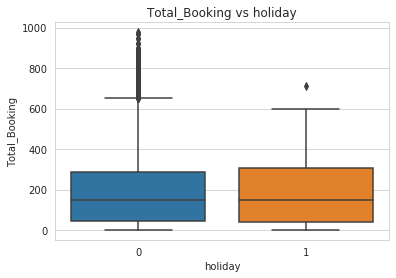

In [ ]:
sns.boxplot(x='holiday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs holiday')
plt.show()

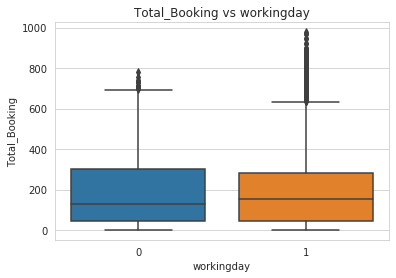

In [ ]:
sns.boxplot(x='workingday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs workingday')
plt.show()

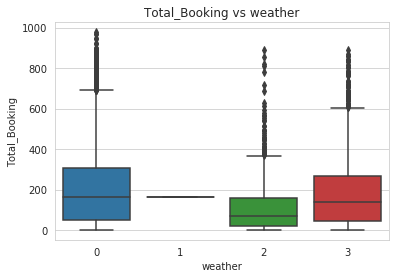

In [ ]:
sns.boxplot(x='weather',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs weather')
plt.show()

In [ ]:
#OBSERVATION:
#points outside whiskers are outliers

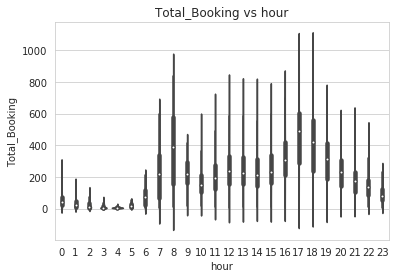

In [ ]:
#VIOLIN PLOTS:
#similar to box plots; additional visual reinforcement for outlier analysis

sns.violinplot(x='hour',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs hour')
plt.show()

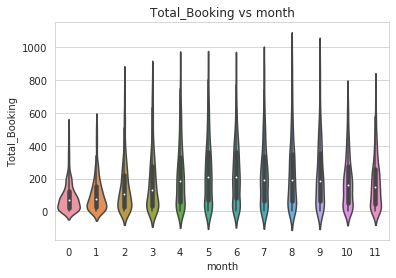

In [ ]:
sns.violinplot(x='month',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs month')
plt.show()

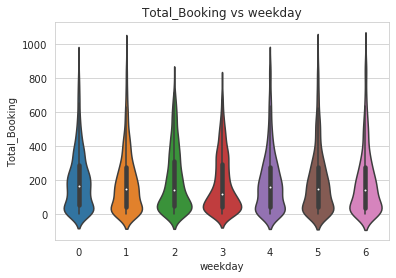

In [ ]:
sns.violinplot(x='weekday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs weekday')
plt.show()

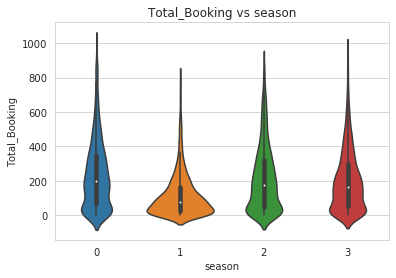

In [ ]:
sns.violinplot(x='season',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs season')
plt.show()

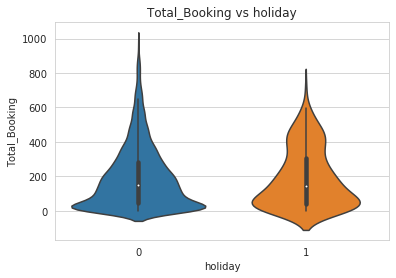

In [ ]:
sns.violinplot(x='holiday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs holiday')
plt.show()

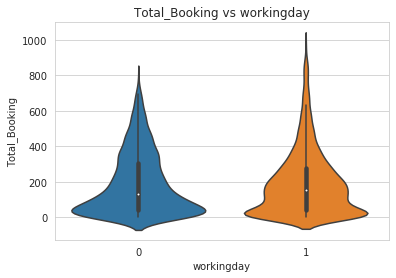

In [ ]:
sns.violinplot(x='workingday',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs workingday')
plt.show()

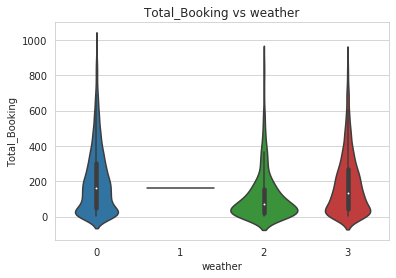

In [ ]:
sns.violinplot(x='weather',y='Total_Booking',data=df_train)
plt.title('Total_Booking vs weather')
plt.show()

In [ ]:
#OBSERVATIONS:
#higher density of plot points in widely spread regions; outliers lie in regions of lower plot point density ie:protruding ends

In [ ]:
#REMOVING OUTLIERS

df = df_train.drop('datetime', axis=1)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df3 = df2['Total_Booking']
df2.head()

,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,19,4,6,2,0,1,0,22.14,25.760,77,16.9979,504
1,4,8,6,0,0,1,0,28.70,33.335,79,19.0012,5
2,9,0,4,1,0,1,0,5.74,6.060,50,22.0028,139
3,16,10,0,3,0,1,0,13.94,16.665,29,8.9981,209
4,13,8,5,0,0,1,0,30.34,33.335,51,19.0012,184


In [ ]:
df.shape #with outliers

(8708, 12)

In [ ]:
df2.shape #without outliers

(8049, 12)

In [ ]:
#LEARNING MODELS

X_train = df2
X_test = df_test
y_train = df3
y_test = test_label_df

In [ ]:
X_train = X_train.drop('Total_Booking',axis=1)
X_train = X_train.drop('temp',axis=1) #high correlation
print(X_train.shape)
X_train.head()

(8049, 10)


,hour,month,weekday,season,holiday,workingday,weather,atemp,humidity,windspeed
0,19,4,6,2,0,1,0,25.760,77,16.9979
1,4,8,6,0,0,1,0,33.335,79,19.0012
2,9,0,4,1,0,1,0,6.060,50,22.0028
3,16,10,0,3,0,1,0,16.665,29,8.9981
4,13,8,5,0,0,1,0,33.335,51,19.0012


In [ ]:
X_test = X_test.drop('datetime',axis=1)
X_test = X_test.drop('temp',axis=1)
print(X_test.shape)
X_test.head()

(2178, 10)


,hour,month,weekday,season,holiday,workingday,weather,atemp,humidity,windspeed
0,19,4,6,2,0,1,0,25.000,48,35.0008
1,4,8,6,2,0,0,0,27.275,64,7.0015
2,9,0,4,1,0,0,1,12.120,100,27.9993
3,16,10,0,3,0,1,2,28.790,83,0.0000
4,13,8,5,2,0,0,0,31.060,43,23.9994


In [ ]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_model = lasso.fit(X_train, y_train)

print('Intercept:', lasso_model.intercept_)
print('coeficient:', lasso_model.coef_)

y_pred_las = lasso_model.predict(X_test)
print(y_pred_las)

Intercept: 176.85700086967324
coeficient: [ 48.75689154  13.66736039  -2.97964515  14.88212851   0.
  -3.84149703   2.36782077  51.95457614 -36.19773048   5.37765543]
[273.96044445 156.45128178   4.32302715 ... 189.24475632 126.92906843
 205.80903076]


In [ ]:
from sklearn.metrics import mean_squared_error

rmse_las = np.sqrt(mean_squared_error(y_test,y_pred_las))
print('Lasso RMSE:', rmse_las)

Lasso RMSE: 164.50591003040427


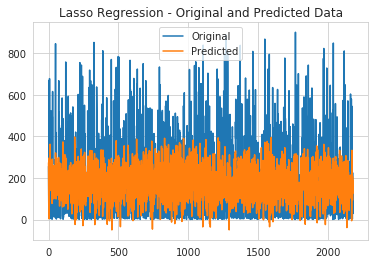

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_las, label="Predicted")
plt.title("Lasso Regression - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin_model = lin.fit(X_train, y_train)
print('Intercept:', lin_model.intercept_)
print('Coefficient:', lin_model.coef_)

y_pred_lin = lin_model.predict(X_test)
print(y_pred_lin)

Intercept: 176.85700086967324
Coefficient: [ 4.92221561e+01  1.40902982e+01 -3.85530859e+00  1.61788024e+01
  5.32907052e-15 -4.77110465e+00  3.85318151e+00  5.33356215e+01
 -3.73968143e+01  6.16569162e+00]
[275.38249988 155.79976626   1.31813195 ... 189.10470512 123.0448691
 203.14596126]


In [ ]:
rmse_lin = np.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Regression RMSE:',rmse_lin)

Linear Regression RMSE: 164.38508055274923


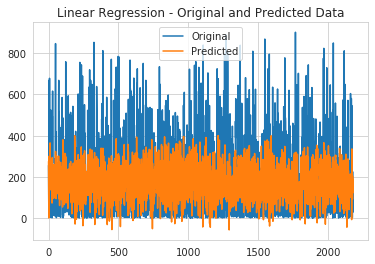

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_lin, label="Predicted")
plt.title("Linear Regression - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor       

dt_reg = DecisionTreeRegressor()

dt_model = dt_reg.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(y_pred_dt)

[118.  26. 157. ... 179.  93. 172.]


In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))
print('Decision Tree RMSE:',rmse_dt)

Decision Tree RMSE: 224.2322028792493


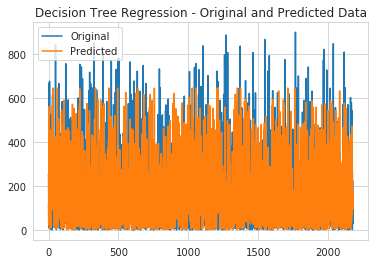

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_dt, label="Predicted")
plt.title("Decision Tree Regression - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR     

sv_reg = SVR(gamma='scale',kernel='poly')
sv_model = sv_reg.fit(X_train,y_train)
y_pred_sv = sv_model.predict(X_test)
print(y_pred_sv)

[256.77160054 131.79649488 -27.9534133  ... 152.12168623 132.39201354
 158.98843248]


In [ ]:
rmse_sv = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('Support Vector RMSE:',rmse_sv)

Support Vector RMSE: 170.96044542949932


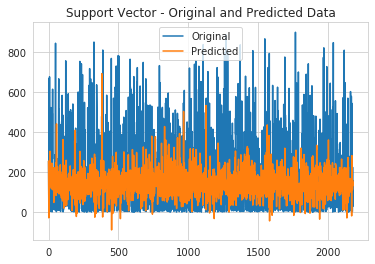

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_sv, label="Predicted")
plt.title("Support Vector - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_params = {'C':[1,3], 'epsilon':[0.1,0.5]}
svm_grid = GridSearchCV(sv_reg, svm_params, cv=10)

svm2 = svm_grid.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)
print(y_pred_svm2)

In [ ]:
rmse_sv2 = np.sqrt(mean_squared_error(y_test,y_pred_svm2))
print('Support Vector Grid Search RMSE:',rmse_sv2)

Support Vector Grid Search RMSE: 169.50002399854367


In [ ]:
svm_grid.best_params_

{'C': 3, 'epsilon': 0.1}

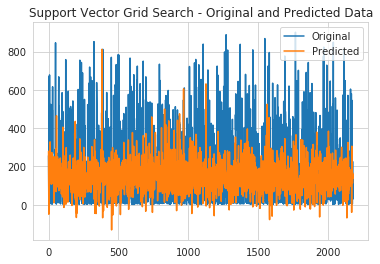

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_svm2, label="Predicted")
plt.title("Support Vector Grid Search - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(X_train,y_train)   
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

[339.4  12.4  70.  ... 227.4 283.4 201.6]


In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('Random Forest RMSE:',rmse_rf)

Random Forest RMSE: 210.7728170071237


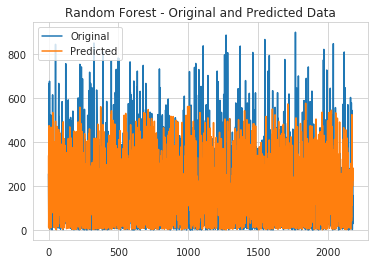

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_rf, label="Predicted")
plt.title("Random Forest - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {'n_estimators':[10,20,30,40], 'max_depth':[8,10,12,14], 'max_leaf_nodes':[70,90,110,130]}
rf_grid = GridSearchCV(rf_reg, rf_params, cv=10)
rf2 = rf_grid.fit(X_train, y_train)

y_pred_rf2 = rf2.predict(X_test)
print(y_pred_rf2)

[407.76000197  15.20822133  82.99979995 ... 203.38050571 276.72809036
 168.25940382]


In [ ]:
rmse_rf2 = np.sqrt(mean_squared_error(y_test,y_pred_rf2))
print('Random Forest Grid Search RMSE:',rmse_rf2)

Random Forest Grid Search RMSE: 209.7634530846771


In [ ]:
rf_grid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 130, 'n_estimators': 40}

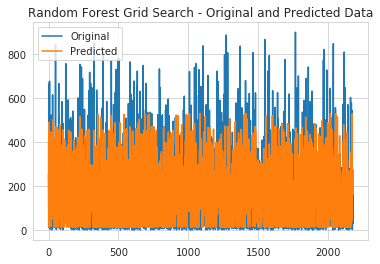

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_rf2, label="Predicted")
plt.title("Random Forest Grid Search - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ab_reg = AdaBoostRegressor()
ab_model = ab_reg.fit(X_train,y_train)   
y_pred_ab = ab_model.predict(X_test)
print(y_pred_ab)

[351.60211028  33.26355422 162.89010989 ... 299.4672279  242.69623329
 350.81833616]


In [ ]:
rmse_ab = np.sqrt(mean_squared_error(y_test,y_pred_ab))
print('AdaBoost RMSE:',rmse_ab)

AdaBoost RMSE: 206.511892951395


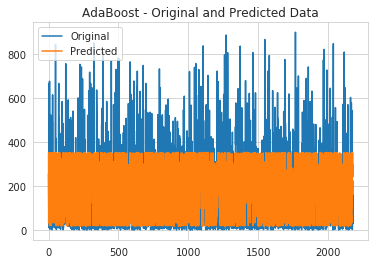

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, y_pred_ab, label="Predicted")
plt.title("AdaBoost - Original and Predicted Data")
plt.legend()
plt.show()

In [ ]:
#the following dataframe summarises the RMSEs of the various Learning ALgorithms used on the Cab Booking data

data = {'ML Models':['Lasso', 'Linear Regression', 'Decision Tree', 'SVM', 'SVM GridSearchCV', 'Random Forest', 'Random Forest GridSearchCV', 'AdaBoost'], 'RMSE':['%0.2f' %rmse_las, '%0.2f' %rmse_lin, '%0.2f' %rmse_dt, '%0.2f' %rmse_sv, '%0.2f' %rmse_sv2, '%0.2f' %rmse_rf, '%0.2f' %rmse_rf2, '%0.2f' %rmse_ab]}
results = pd.DataFrame(data)
results

,ML Models,RMSE
0,Lasso,164.51
1,Linear Regression,164.39
2,Decision Tree,224.23
3,SVM,170.96
4,SVM GridSearchCV,169.50
5,Random Forest,210.77
6,Random Forest GridSearchCV,209.76
7,AdaBoost,206.51


In [ ]:
'''
CONCLUSION:
As seen in the df above, Linear Regression (164.39) is the best ML algorithm for this cab booking examples as it has the least
RMSE which is not a hard and fast rule but certainly is an indicator of a better model

Decision trees seem to have the highest RMSE in this case, it is essentially the most inaccurate model. Not good for predicting
cab booking systems

This trend and findings correspond with the graphs generated per model, contrasting the difference in the original and predicted
data points. The graph of predicted values for Linear Regression resembles its graph of original values where as the graphs for
say Decision Trees or SVMs or Random Forests have graphs for predicted values which span all over the graph for original values,
resulting in higher inaccuracy.
'''

'\nCONCLUSION:\nAs seen in the df above, Linear Regression (164.39) is the best ML algorithm for this cab booking examples as it has the least\nRMSE which is not a hard and fast rule but certainly is an indicator of a better model\n\nDecision trees seem to have the highest RMSE in this case, it is essentially the most inaccurate model. Not good for predicting\ncab booking systems\n\nThis trend and findings correspond with the graphs generated per model, contrasting the difference in the original and predicted\ndata points. The graph of predicted values for Linear Regression resembles its graph of original values where as the graphs for\nsay Decision Trees or SVMs or Random Forests have graphs for predicted values which span all over the graph for original values,\nresulting in higher inaccuracy.\n'